<a href="https://colab.research.google.com/github/panagiotisl/ai-art-with-stable-diffusion/blob/main/5_Inpainting_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook lets you perform inpainting, which means that you can replace the content of an image using a mask to specify the areas that you wish to recreate using AI art.

In [ ]:
%pip install -q accelerate transformers ftfy bitsandbytes==0.35.0 gradio natsort safetensors xformers diffusers

#@title Login to HuggingFace 🤗

#@markdown You need to accept the model license before downloading or using the Stable Diffusion weights. Please, visit the [model card](https://huggingface.co/runwayml/stable-diffusion-v1-5), read the license and tick the checkbox if you agree. You have to be a registered user in 🤗 Hugging Face Hub, and you'll also need to use an access token for the code to work.
# https://huggingface.co/settings/tokens
!mkdir -p ~/.huggingface
HUGGINGFACE_TOKEN = "" #@param {type:"string"}
!echo -n "{HUGGINGFACE_TOKEN}" > ~/.huggingface/token

import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":16:8"

import torch
from diffusers import DDIMScheduler, StableDiffusionInpaintPipeline
from IPython.display import display
import numpy as np

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
    use_safetensors=False,
).to("cuda")
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
g = torch.Generator(device="cuda")

torch.backends.cudnn.benchmark = False
torch.use_deterministic_algorithms(True)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.0/167.0 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.7 

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
For effortless bug reporting copy-paste your error into this form: https://docs.google.com/forms/d/e/1FAIpQLScPB8emS3Thkp66nvqwmjTEgxp8Y9ufuWTzFyr9kJ5AoI47dQ/viewform?usp=sf_link
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching /usr/local/cuda/lib64...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:105: UserWarning: /usr/lib64-nvidia did not contain libcudart.so as expected! Searching further paths...
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('//172.28.0.1'), PosixPath('8013'), PosixPath('http')}
  warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/paths.py:27: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --target_host=172.28.0.12 --tunnel_background_save_url=http

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


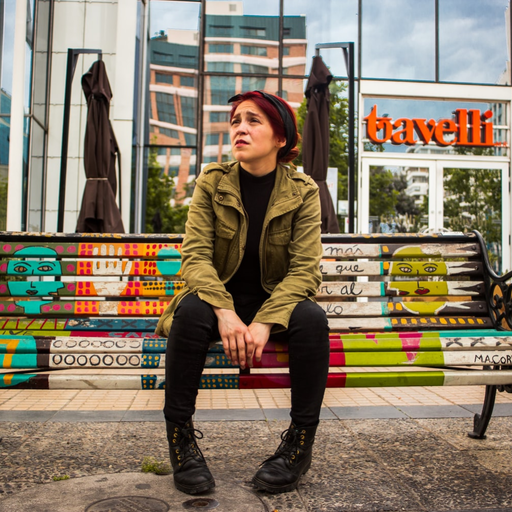

In [ ]:
import PIL
import requests
import torch
from io import BytesIO


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/photo-1583445095369-9c651e7e5d34.png"
init_image = download_image(img_url).resize((512, 512))
init_image

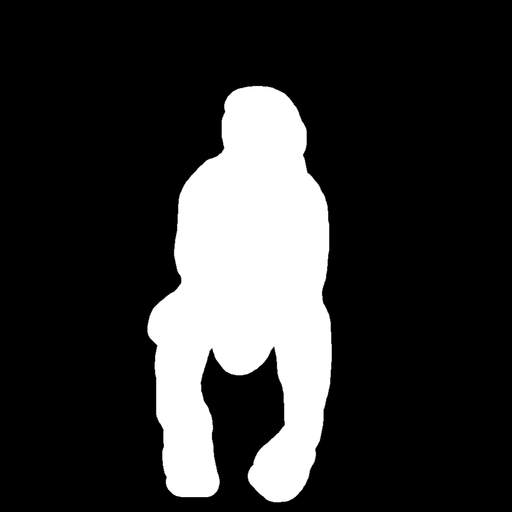

In [ ]:
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/photo-1583445095369-9c651e7e5d34_mask.png"
mask_image = download_image(mask_url).resize((512, 512))
mask_image

  0%|          | 0/50 [00:00<?, ?it/s]

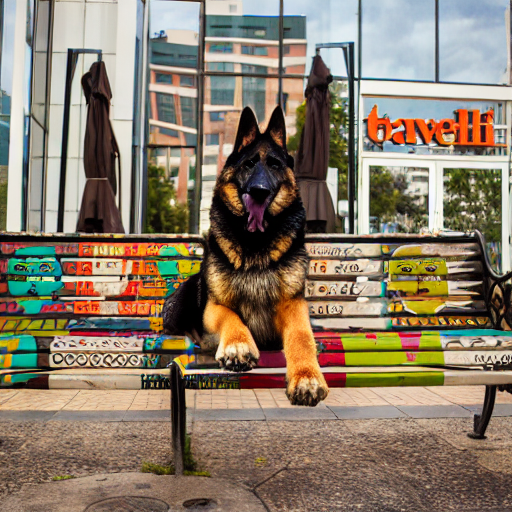

In [ ]:
prompt = "A german shepherd dog, high resolution, sitting on a park bench"
g.manual_seed(46)
images = pipe(prompt=prompt,
               guidance_scale = 8,
               image=init_image, mask_image=mask_image,
               generator=g).images
for img in images:
    display(img)

  0%|          | 0/50 [00:00<?, ?it/s]

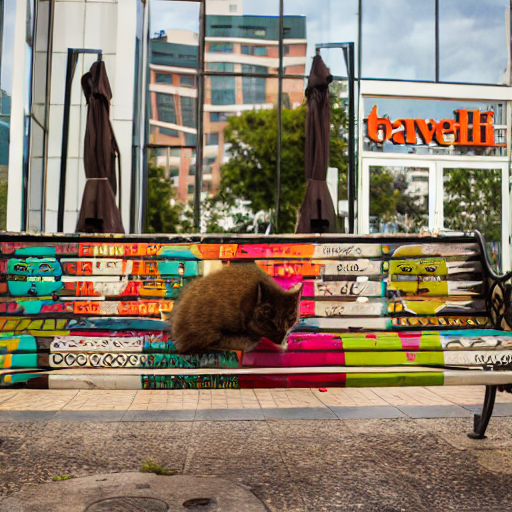

In [ ]:
prompt = "A yellow cat, high resolution, sitting on a park bench"
g.manual_seed(48)
images = pipe(prompt=prompt,
               guidance_scale = 8,
               image=init_image, mask_image=mask_image,
               generator=g).images
for img in images:
    display(img)

  0%|          | 0/50 [00:00<?, ?it/s]

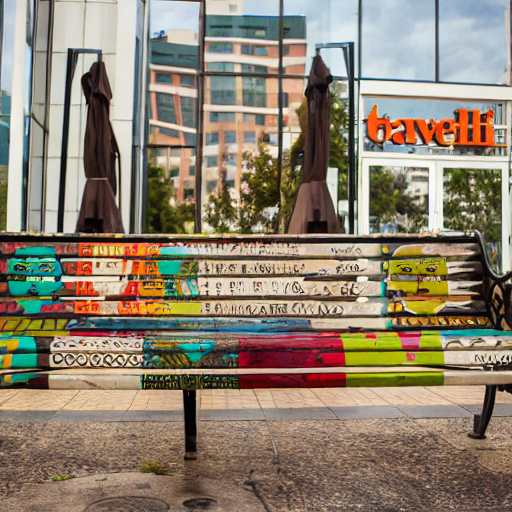

In [ ]:
prompt = "A bench, high resolution"
g.manual_seed(463)
images = pipe(prompt=prompt,
               guidance_scale = 8,
               image=init_image, mask_image=mask_image,
               generator=g).images
for img in images:
    display(img)

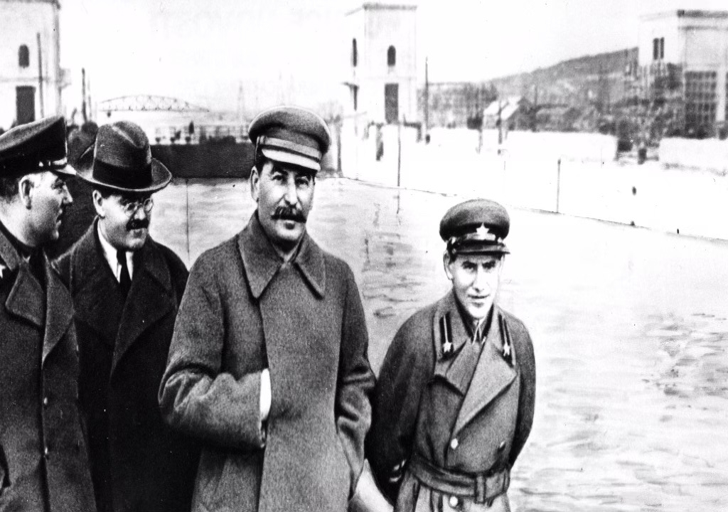

In [ ]:
img_url = "https://raw.githubusercontent.com/panagiotisl/ai-art-with-stable-diffusion/main/images/stalin.jpg"
init_image = download_image(img_url).resize((728, 512))
init_image

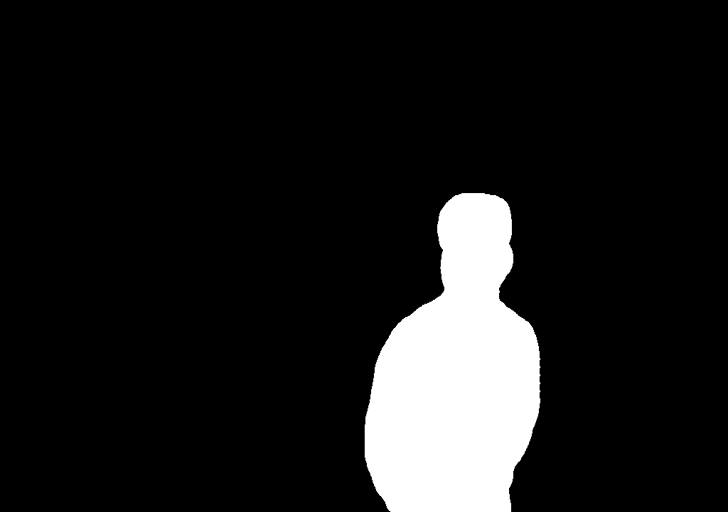

In [ ]:
mask_url = "https://raw.githubusercontent.com/panagiotisl/ai-art-with-stable-diffusion/main/images/stalin-mask.jpg"
mask_image = download_image(mask_url).resize((728, 512))
mask_image

  0%|          | 0/50 [00:00<?, ?it/s]

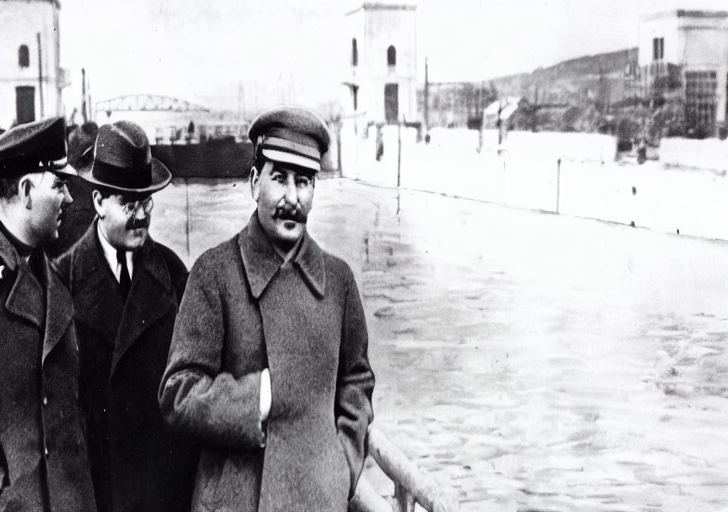

In [ ]:
prompt = "A river"
g.manual_seed(47)
images = pipe(prompt=prompt,
               width = 728,
               guidance_scale = 8,
               image=init_image, mask_image=mask_image,
               generator=g).images
for img in images:
    display(img)

  0%|          | 0/80 [00:00<?, ?it/s]

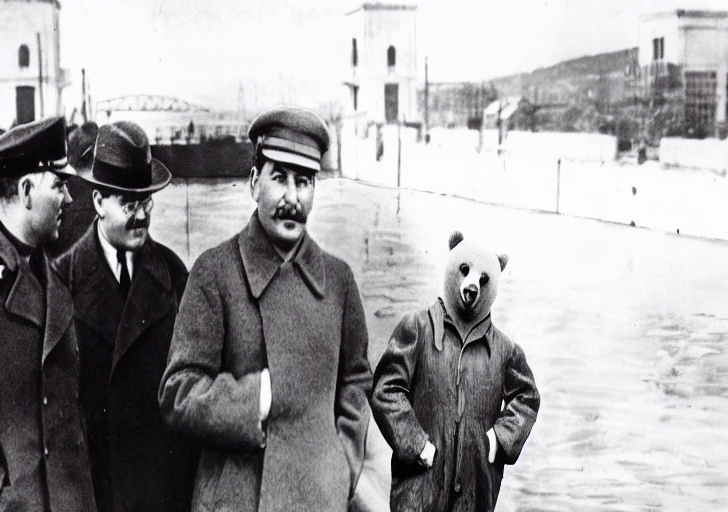

In [ ]:
prompt = "Three men next to ((a bear))"
g.manual_seed(5344)
images = pipe(prompt=prompt,
               width = 728,
               guidance_scale = 14,
               num_inference_steps=80,
               image=init_image, mask_image=mask_image,
               generator=g).images
for img in images:
    display(img)